# Using NLTK

거의 모든 자연어 프로젝트에 필요한 기본 작업 중 일부는 NLTK로 쉽게 수행할 수 있습니다. 예를 들어, 처리할 텍스트를 처리하기 전에 단어로 세분화해야 합니다. 다음 코드 스니펫에 표시된 것처럼 NLTK의 word_tokenize 함수를 사용하여 이 작업을 수행할 수 있습니다:

In [2]:
#using nltk
import nltk
import string
from nltk import word_tokenize

# Download the 'punkt_tab' data package
nltk.download('punkt_tab')

text = "we'd like to book a flight from boston to london"
tokenized_text = word_tokenize(text)
print(tokenized_text)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


['we', "'d", 'like', 'to', 'book', 'a', 'flight', 'from', 'boston', 'to', 'london']


we'd라는 단어는 실제로 두 단어를 나타내는 수축이기 때문에 we와 'd'라는 두 가지 구성 요소로 분리되어 있습니다: we와 would.

또한 NLTK는 텍스트에서 단어 빈도를 계산하는 것과 같은 기본 통계에 대한 몇 가지 기능도 제공합니다. 예를 들어, 방금 살펴본 텍스트를 계속해서 보스턴에서 런던으로 가는 항공편을 예약하고 싶습니다. NLTK FreqDist() 함수를 사용하여 각 단어가 얼마나 자주 발생하는지 세어볼 수 있습니다:

In [6]:
# Download the 'averaged_perceptron_tagger_eng' data package
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


True

In [7]:
from nltk.probability import FreqDist
FreqDist(tokenized_text)

FreqDist({'to': 2, 'we': 1, "'d": 1, 'like': 1, 'book': 1, 'a': 1, 'flight': 1, 'from': 1, 'boston': 1, 'london': 1})

이 예제에서는 NLTK의 확률 패키지에서 FreqDist() 함수를 가져와 텍스트 내 각 단어의 빈도를 계산하는 데 사용했습니다. 결과적으로 키는 단어이고 값은 단어가 얼마나 자주 발생하는지를 나타내는 Python 딕트가 됩니다. 단어는 두 번 발생하고 다른 단어는 각각 한 번 발생합니다. 이렇게 짧은 텍스트의 경우 빈도 분포가 특별히 통찰력이 있는 것은 아니지만, 더 많은 양의 데이터를 볼 때 매우 유용할 수 있습니다.

NLTK는 3장에서 논의한 품사 태깅(POS)도 할 수 있습니다. 예제를 계속 진행하면서 POS 태깅에는 nLtk.pos_tag(토큰화된_텍스트) 함수가 사용됩니다:

In [8]:
nltk.pos_tag(tokenized_text)

[('we', 'PRP'),
 ("'d", 'MD'),
 ('like', 'VB'),
 ('to', 'TO'),
 ('book', 'NN'),
 ('a', 'DT'),
 ('flight', 'NN'),
 ('from', 'IN'),
 ('boston', 'NN'),
 ('to', 'TO'),
 ('london', 'VB')]

마찬가지로 NLTK는 텍스트 구문 분석을 위한 기능을 제공합니다. 구문 분석은 3장에서 논의되었음을 기억하세요. 1장에서 설명한 것처럼 NLTK는 **regular
expressions (regexes)**을 생성하고 적용하는 기능도 제공합니다.

# Using spaCy

spacCy는 NLTK와 동일한 NLP 작업을 수행할 수 있는 또 다른 인기 있는 패키지입니다. 두 툴킷 모두 매우 유능합니다. spacCy는 일반적으로 더 빠르기 때문에 배포된 애플리케이션에 더 적합합니다. 두 툴킷 모두 많은 언어를 지원하지만 모든 NLU 작업이 모든 언어에서 지원되는 것은 아니므로 NLTK와 spacCy 중 하나를 선택할 때는 해당 애플리케이션에 대한 특정 언어 요구 사항을 고려하는 것이 중요합니다. NLTK와 마찬가지로 spacCy는 많은 기본 텍스트 처리 기능을 수행할 수 있습니다.

spacCy에서 토큰화를 설정하는 코드는 NLTK의 코드와 매우 유사하며, 함수 이름이 약간 다릅니다. 그 결과 각 요소가 하나의 토큰인 단어 배열이 됩니다. nlp 객체는 특정 웹 기반 데이터 집합인 en_core_web_sm:의 통계를 사용하라는 en_core_web_sm 모델로 초기화된다는 점에 유의하세요:

In [9]:
#tokenize text with SpaCy
import spacy
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')
text = "we'd like to book a flight from boston to london"

doc = nlp(text)
print ([token.text for token in doc])

['we', "'d", 'like', 'to', 'book', 'a', 'flight', 'from', 'boston', 'to', 'london']


텍스트에서 발생하는 단어의 빈도와 같은 통계도 계산할 수 있습니다:

In [10]:
#make an array of tokens
words = [token.text for token in doc]

In [11]:
#collect word frequency statistics with SpaCy

from collections import Counter

word_freq = Counter(words)
print(word_freq)

Counter({'to': 2, 'we': 1, "'d": 1, 'like': 1, 'book': 1, 'a': 1, 'flight': 1, 'from': 1, 'boston': 1, 'london': 1})


NLTK와 마찬가지로 spacCy로 POS 태깅을 수행할 수 있습니다:

In [12]:
# Just as with NLTK, we can perform POS tagging with spaCy:
for token in doc:
    print(token.text, token.pos_)

we PRON
'd AUX
like VERB
to PART
book VERB
a DET
flight NOUN
from ADP
boston PROPN
to ADP
london PROPN


안타깝게도 NLTK와 spacCy는 음성의 다른 부분에 대해 서로 다른 레이블을 사용합니다. 이는 반드시 문제가 되는 것은 아닙니다. 한 언어에 대해서도 정확하거나 표준적인 음성 부분 집합이 없기 때문입니다. 그러나 애플리케이션 내에서 음성 부분이 일관되게 유지되는 것이 중요하므로 개발자는 이러한 차이를 인식하고 NLTK와 spacCy 음성 부분을 혼동하지 않도록 주의해야 합니다.

Spacy가 제공하는 또 다른 매우 유용한 기능은 **named entity recognition (NER)**이라고 합니다. NER은 텍스트에서 발생하는 특정 사람, 조직, 위치 또는 기타 엔티티에 대한 참조를 식별하는 작업입니다. NER은 그 자체로 목적이 될 수도 있고 다른 작업의 일부가 될 수도 있습니다. 예를 들어, 회사는 Facebook에서 제품이 언급되는 시점을 찾는 데 관심이 있을 수 있으므로 제품에 대한 NER만 있으면 됩니다. 반면에 회사는 제품이 긍정적인 방식으로 언급되는지 부정적인 방식으로 언급되는지 파악하는 데 관심이 있을 수 있으므로, 이 경우 NER과 **sentiment analysis (SA)**을 모두 수행하고자 합니다.

In [13]:
from spacy import displacy

NER은 대부분의 NLP 라이브러리에서 수행할 수 있지만, spacCy에서는 특히 쉽게 수행할 수 있습니다. 문서가 주어지면 다음과 같이 ent 스타일을 사용하여 문서 렌더링을 요청하기만 하면 됩니다:

렌더링된 결과는 보스턴과 뉴욕에 명명된 엔티티에 지정학적 엔티티(GPE, **geopolitical entity (GPE)**) 라벨이 할당되었음을 보여줍니다

In [14]:
import spacy

nlp = spacy.load("en_core_web_sm")
text = "we'd like to book a flight from boston to new york"
doc = nlp(text)
displacy.render(doc,style='ent',jupyter=True,options={'distance':200})

문장 내 단어들 간의 구문 관계를 구문 분석하거나 분석하는 것은 스타일 매개변수 값을 ent에서 dep로 변경하는 것만으로도 거의 동일한 코드로 매우 쉽게 수행할 수 있습니다.

In [15]:
nlp = spacy.load('en_core_web_sm')
doc = nlp('they get in an accident')
displacy.render(doc,style='dep',jupyter=True,options={'distance':200})

# Using Keras

# Looking at an example

In [16]:
# NLP imports
import nltk
import spacy
from spacy import displacy
# general numerical and visualization imports
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

In [17]:
# open the nltk downloader
# note that the downloader might be minimized in your toolbar
# the downloader is a modal window, so the Jupyter notebook will wait for you to do something with it
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> q

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

데이터를 다운로드한 디렉토리를 보면 네거티브와 포지티브라는 두 개의 디렉토리가 표시됩니다. 디렉토리에는 각각 부정적인 리뷰와 긍정적인 리뷰가 포함되어 있습니다. 이는 리뷰의 주석, 즉 리뷰가 긍정적인지 부정적인지에 대한 인간 주석자의 의견을 나타냅니다. 이 디렉토리 구조는 텍스트 분류 주석을 표현하는 데 일반적인 접근 방식이며, 많은 데이터 세트에서 볼 수 있습니다. movie_reviews 폴더의 README 파일은 주석이 어떻게 수행되었는지에 대한 몇 가지 세부 정보를 설명합니다.

In [19]:
#import the training data
nltk.download('movie_reviews')
from nltk.corpus import movie_reviews
sents = movie_reviews.sents()
print(sents)
[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church',
'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get',
'into', 'an', 'accident', '.'], ...]

sample = sents[9]
print(sample)
['they', 'seem', 'to', 'have', 'taken', 'this', 'pretty', 'neat',
'concept', ',', 'but', 'executed', 'it', 'terribly', '.']

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


[['plot', ':', 'two', 'teen', 'couples', 'go', 'to', 'a', 'church', 'party', ',', 'drink', 'and', 'then', 'drive', '.'], ['they', 'get', 'into', 'an', 'accident', '.'], ...]
['they', 'seem', 'to', 'have', 'taken', 'this', 'pretty', 'neat', 'concept', ',', 'but', 'executed', 'it', 'terribly', '.']


['they',
 'seem',
 'to',
 'have',
 'taken',
 'this',
 'pretty',
 'neat',
 'concept',
 ',',
 'but',
 'executed',
 'it',
 'terribly',
 '.']

## Looking at corpus properties
### Word frequencies
이 섹션에서는 전체 말뭉치의 몇 가지 속성을 살펴보겠습니다. 예를 들어 다음 코드를 사용하여 가장 빈번한 단어를 살펴볼 수 있습니다:

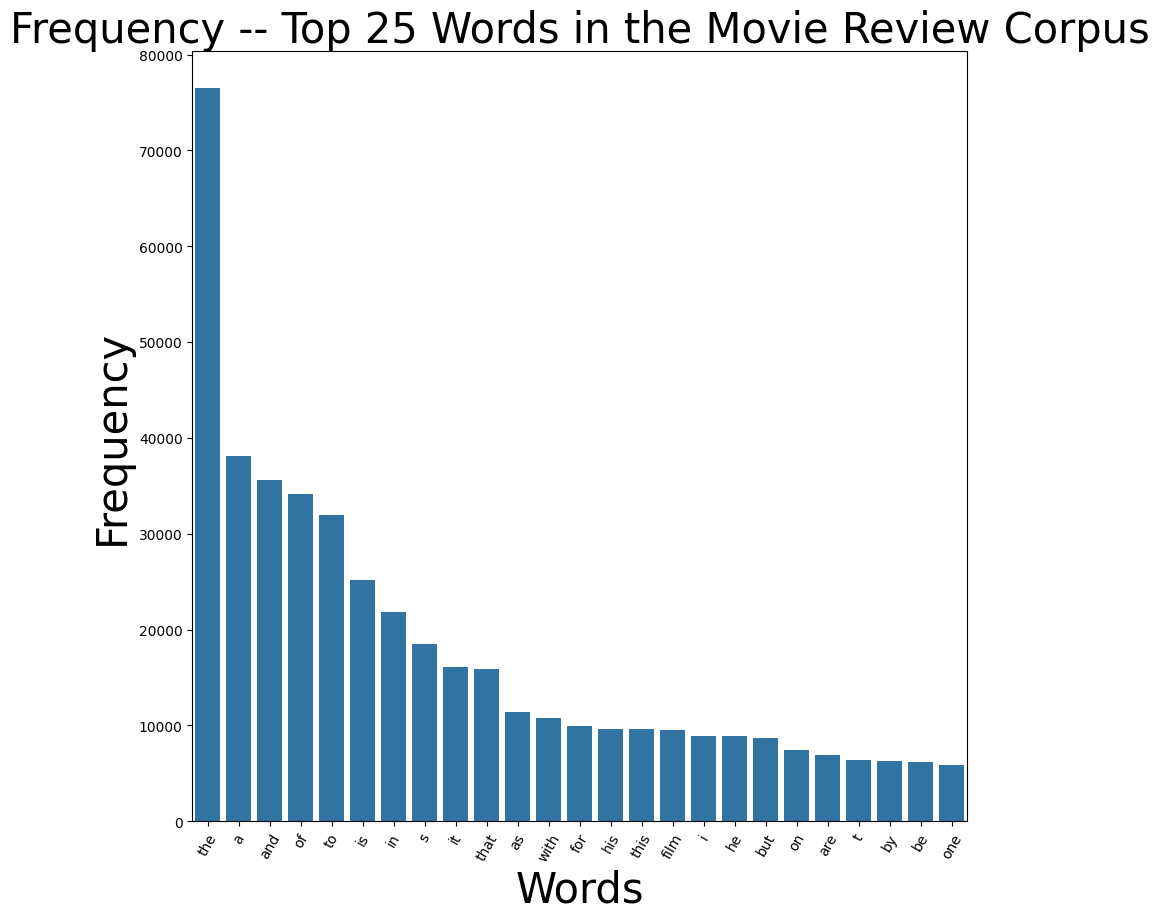

In [20]:
#displaying the most frequent 25 words
words = movie_reviews.words()
word_counts = nltk.FreqDist(word.lower() for word in words if word.
isalpha())
top_words = word_counts.most_common(25)
all_fdist = pd.Series(dict(top_words))
# Setting fig and ax into variables
fig, ax = plt.subplots(figsize=(10,10))
# Plot with Seaborn plotting tools
plt.xticks(rotation = 70)
plt.title("Frequency -- Top 25 Words in the Movie Review Corpus",
fontsize = 30)
plt.xlabel("Words", fontsize = 30)
plt.ylabel("Frequency", fontsize = 30)
all_plot = sns.barplot(x = all_fdist.index, y = all_fdist.values,
ax=ax)
plt.xticks(rotation=60)
plt.show()

앞서 언급한 코드에서 볼 수 있듯이, 우리는 말뭉치 객체의 단어() 메서드를 사용하여 movie_review 코퍼스의 단어를 수집하는 것부터 시작합니다. 그런 다음 NLTK의 FreqDist() 함수를 사용하여 단어를 세어봅니다. 동시에 단어를 소문자로 바꾸고 숫자나 구두점과 같은 비알파 단어는 무시합니다. 그런 다음 시각화의 명확성을 위해 가장 자주 볼 단어를 가장 자주 볼 수 있는 25단어로 제한합니다. 코드 블록에서 상위_단어의 다양한 값을 시도하여 점점 더 적은 단어로 그래프가 어떻게 보이는지 확인해 보세요.

단어 빈도를 시각화하는 또 다른 방법으로 도움이 될 수 있는 단어 클라우드(**word cloud**)가 있습니다. 여기서 더 자주 사용되는 단어들은 더 큰 글꼴로 표시됩니다. 다음 스니펫은 우리의 단어 빈도 분포인 all_fdist에서 단어 클라우드를 계산하고 이를 Matplotlib로 표시하는 코드를 보여줍니다:

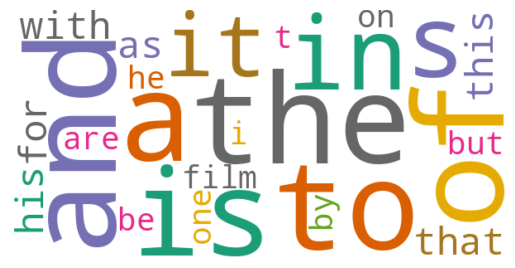

In [21]:
# displaying a WordCloud
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white',

max_words = 25,
relative_scaling = 0,
width = 600,height = 300,
max_font_size = 150,
colormap = 'Dark2',
min_font_size = 10).generate_from_frequencies(all_fdist)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

거의 모든 빈번한 단어는 대부분의 영어 텍스트에서 일반적으로 사용되는 단어라는 점에 유의하세요. 예외는 영화(**film**)이며, 영화 리뷰 코퍼스에서 기대할 수 있는 단어입니다. 이러한 빈번한 단어의 대부분은 대부분의 텍스트에서 발생하기 때문에 텍스트의 다양한 범주를 구분할 수 없습니다. SA와 같은 분류 문제를 다루고 있다면 이 코퍼스에서 SA 분류기를 훈련하기 전에 텍스트에서 이러한 일반적인 단어를 제거하는 것을 고려해야 합니다. 이러한 종류의 단어를 **stopwords**라고 하며, 이를 제거하는 것이 일반적인 전처리 단계입니다.

### POS frequencies
먼저 말뭉치에서 문장을 추출한 다음 각 단어에 품사를 태그합니다. 많은 단어에는 여러 품사가 있고 단어에 할당된 POS는 문장의 다른 단어에 따라 달라지기 때문에 개별 단어가 아닌 문장 전체에 대해 POS 태그를 지정하는 것이 중요합니다. 예를 들어, 책을 읽을 때 비행기를 인식하고 동사로 태그할 수 있는 반면, 책을 읽을 때는 명사로 태그할 수 있습니다. 다음 코드에서는 이 말뭉치의 품사 빈도를 표시합니다:

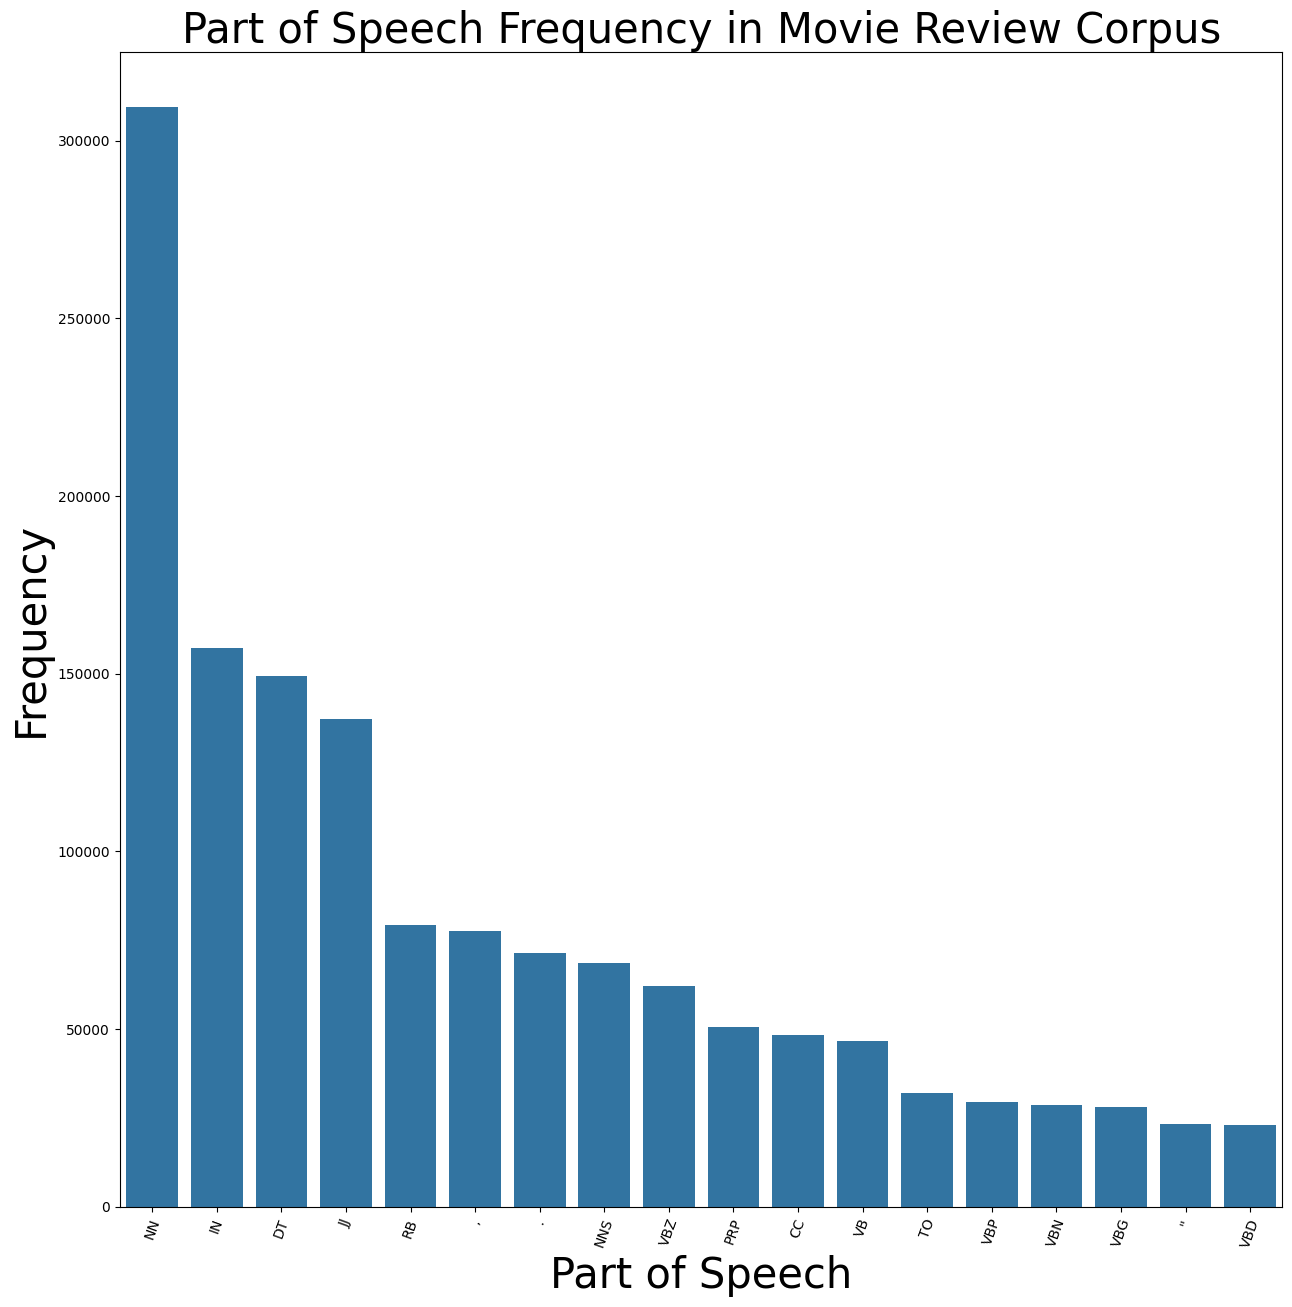

In [22]:
# looking at part of speech frequency in the movie corpus
movie_reviews_sentences = movie_reviews.sents()
tagged_sentences = nltk.pos_tag_sents(movie_reviews_sentences)
total_counts = {}
for sentence in tagged_sentences:
    counts = Counter(tag for word,tag in sentence)
    total_counts = Counter(total_counts) + Counter(counts)
sorted_tag_list = sorted(total_counts.items(), key = lambda x:
x[1],reverse = True)
all_tags = pd.DataFrame(sorted_tag_list)
most_common_tags = all_tags.head(18)

# Setting figure and ax into variables
fig, ax = plt.subplots(figsize=(15,15))
all_plot = sns.barplot(x = most_common_tags[0], y = most_common_tags[1], ax = ax)
plt.xticks(rotation = 70)
plt.title("Part of Speech Frequency in Movie Review Corpus", fontsize
= 30)
plt.xlabel("Part of Speech", fontsize = 30)
plt.ylabel("Frequency", fontsize = 30)
plt.show()

영화 리뷰 코퍼스에서 가장 일반적인 태그는 NN 또는 일반 명사이며, 그 다음으로 IN 또는 전치사 또는 조정 접속사, 그리고 DT 또는 결정자가 뒤따르는 것을 볼 수 있습니다.

텍스트 길이의 분포와 같은 다른 텍스트 속성을 살펴볼 수 있으며, 긍정적 리뷰와 부정적 리뷰의 속성을 비교하여 두 범주를 구분하는 몇 가지 속성을 찾을 수 있는지 확인할 수 있습니다. 긍정적 리뷰와 부정적 리뷰의 평균 길이 또는 품사 분포가 다른가요? 차이점을 발견하면 새로운 리뷰를 분류하는 데 이를 활용할 수 있습니다.